In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_excel(r'C:\Data Science course\Statitics for Data science\Data Analysis\Data.xlsx', skiprows= 2)

In [3]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  object 
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(6), 

## Date cleaning part

## salary columns 

#### we are find the salary columns in object so we have to convert as int or float

In [5]:
## method 1

df['salary'] = np.where(df['salary'] == '?', np.nan, df['salary']) . astype('float')

In [6]:
## method 2

df['salary'].apply(lambda x: str(x).replace('?','nan')).astype('float')

0        100000.0
1         60000.0
2        120000.0
3         20000.0
4             0.0
           ...   
45206     60000.0
45207     55000.0
45208     55000.0
45209     20000.0
45210    120000.0
Name: salary, Length: 45211, dtype: float64

In [7]:
### method - 3

## begineer method

for val in df['salary']:
    if val == '?':
        print(np.nan)
    else:
        print(val)

100000.0
60000.0
120000.0
20000.0
0.0
100000.0
100000.0
120000.0
55000.0
60000.0
50000.0
50000.0
60000.0
60000.0
70000.0
55000.0
50000.0
20000.0
55000.0
70000.0
20000.0
100000.0
20000.0
70000.0
55000.0
50000.0
100000.0
120000.0
100000.0
60000.0
60000.0
100000.0
50000.0
20000.0
100000.0
60000.0
20000.0
60000.0
50000.0
50000.0
70000.0
100000.0
20000.0
55000.0
55000.0
50000.0
60000.0
60000.0
60000.0
100000.0
20000.0
100000.0
100000.0
50000.0
60000.0
120000.0
100000.0
20000.0
20000.0
70000.0
50000.0
60000.0
20000.0
70000.0
20000.0
100000.0
55000.0
100000.0
60000.0
20000.0
20000.0
70000.0
100000.0
20000.0
60000.0
60000.0
20000.0
70000.0
70000.0
70000.0
50000.0
70000.0
60000.0
50000.0
60000.0
20000.0
50000.0
60000.0
100000.0
55000.0
100000.0
60000.0
50000.0
20000.0
120000.0
100000.0
20000.0
55000.0
60000.0
100000.0
20000.0
20000.0
20000.0
20000.0
60000.0
20000.0
60000.0
50000.0
55000.0
100000.0
70000.0
60000.0
60000.0
20000.0
55000.0
20000.0
50000.0
100000.0
100000.0
60000.0
60000.0
20000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45149 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

## filling the null values

#### Numerical variable : mean and median
#### Nategorcical vairable : mode

# fill the age columns null values



In [9]:
df['age'].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

C:\Users\SUHAIL SHABNAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

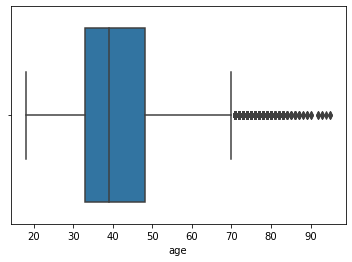

In [10]:
sns.boxplot(df['age'])

In [11]:
age_med = df['age'].median()
age_med

39.0

In [12]:
df['age'] = df['age'].fillna(age_med)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45211 non-null  float64
 2   salary      45149 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

# Domain Knowledge

In [14]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [15]:
df['job_role'] = df['jobedu'].apply(lambda x: x.split(',')[0])
df['Education'] = df['jobedu'].apply(lambda x: x.split(',')[1])

In [16]:
df.head(2)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,Education
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [17]:
df.groupby('job_role').count()[['customerid', 'salary']]

,customerid,salary
job_role,,
admin.,5171,5171
blue-collar,9732,9732
entrepreneur,1487,1487
housemaid,1240,1240
management,9458,9458
retired,2264,2264
self-employed,1579,1579
services,4154,4154
student,938,938


In [18]:
df[df['job_role'] == 'unknown']['salary']

4        0.0
216      0.0
354      0.0
876      0.0
1072     0.0
        ... 
44714    0.0
44742    0.0
44970    0.0
45141    0.0
45186    0.0
Name: salary, Length: 288, dtype: float64

In [19]:
df['salary'] = df['salary'].fillna(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45211 non-null  float64
 2   salary      45211 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
 19  job_role    45211 non-nul

In [21]:
df['month'].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [22]:
df['month'].describe()

count         45161
unique           12
top       may, 2017
freq          13747
Name: month, dtype: object

In [23]:
df['month'].isnull().sum()

50

In [24]:
mode_month = df['month'].mode()[0]
mode_month

'may, 2017'

In [25]:
df['month'] = df['month'].fillna(mode_month)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45211 non-null  float64
 2   salary      45211 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45211 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
 19  job_role    45211 non-nul

# Response variable is Dependent variable

#### If you have null value in a dependent variable jsut seperate the null value dataset this dataset is call test data and non null vlue is a train data


In [27]:
df['response'].isnull().value_counts()
                                 

False    45181
True        30
Name: response, dtype: int64

### Here we dropping the entire null values for the dataset from the response column, not only dropping response reocrds
### we drop all the response along with the rest of the records in the dataset

In [28]:
df.dropna(inplace = True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45181 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45181 non-null  int64  
 1   age         45181 non-null  float64
 2   salary      45181 non-null  float64
 3   balance     45181 non-null  int64  
 4   marital     45181 non-null  object 
 5   jobedu      45181 non-null  object 
 6   targeted    45181 non-null  object 
 7   default     45181 non-null  object 
 8   housing     45181 non-null  object 
 9   loan        45181 non-null  object 
 10  contact     45181 non-null  object 
 11  day         45181 non-null  int64  
 12  month       45181 non-null  object 
 13  duration    45181 non-null  object 
 14  campaign    45181 non-null  int64  
 15  pdays       45181 non-null  int64  
 16  previous    45181 non-null  int64  
 17  poutcome    45181 non-null  object 
 18  response    45181 non-null  object 
 19  job_role    45181 non-nul

### Data Analysis

- Univariate Analysis
- Bi_Variate Analysis
- Multi_variate Analysis

#### I am creating a for loop to convert all the duration which is sec lets convert into mins

In [30]:
dur = []

for val in df['duration']:
    if 'sec' in val:
        dur.append(float(val.split()[0])/60)
    else: 
        dur.append(float(val.split()[0]))
        
df['duration'] = dur

In [31]:
df['duration'] = np.round(df['duration'],2)
df['duration']

0         4.35
1         2.52
2         1.27
3         1.53
4         3.30
         ...  
45206    16.28
45207     7.60
45208    18.78
45209     8.47
45210     6.02
Name: duration, Length: 45181, dtype: float64

In [32]:
df.head(2)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,Education
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",4.35,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",2.52,1,-1,0,unknown,no,technician,secondary


In [33]:
df['duration'].describe()

count    45181.000000
mean         4.302472
std          4.292521
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64

## Binning

In [34]:
pd.cut(df['duration'],4).value_counts(normalize = True)

(-0.082, 20.492]    0.988756
(20.492, 40.985]    0.010690
(40.985, 61.478]    0.000487
(61.478, 81.97]     0.000066
Name: duration, dtype: float64

In [35]:
pd.cut(df['duration'],[0,5,10,15,20,30,70,80,90]).value_counts(normalize = True)

(0, 5]      0.728540
(5, 10]     0.187658
(10, 15]    0.052415
(15, 20]    0.018992
(20, 30]    0.010027
(30, 70]    0.002346
(80, 90]    0.000022
(70, 80]    0.000000
Name: duration, dtype: float64

In [36]:
pd.cut(df['salary'],3,labels = ['Low','Medium','High']).value_counts(normalize = True)

Medium    0.459175
Low       0.298688
High      0.242137
Name: salary, dtype: float64

In [37]:
df.head(2)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,Education
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",4.35,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",2.52,1,-1,0,unknown,no,technician,secondary


In [38]:
del df['customerid']

### Understanding about numerical and catogorical columns.

In [39]:
num_df = df.select_dtypes('number')
cat_df = df.select_dtypes("object")

In [40]:
from ipywidgets import interact, interact_manual

In [41]:
@interact_manual

def histogram(col = num_df):
    sns.histplot(df[col]);

interactive(children=(Dropdown(description='col', options=('age', 'salary', 'balance', 'day', 'duration', 'cam…

## Bi variate Analysis

- Duration and Response

In [42]:
df.groupby('response')['duration'].agg({'mean', 'median','min','max'})

,min,mean,max,median
response,,,,
no,0.00,3.685754,81.97,2.73
yes,0.13,8.956034,64.68,7.10


## Interact using grouping

In [43]:
@interact

def grouping(col1 = cat_df.columns, col2 = num_df.columns):
    return df.groupby(col1)[col2].agg({'min','mean','median','max'})

interactive(children=(Dropdown(description='col1', options=('marital', 'jobedu', 'targeted', 'default', 'housi…

## Interact using Plotting

In [44]:
@interact_manual

def plotting(col1 = cat_df.columns, col2 = num_df.columns):
    sns.barplot(df[col1], df[col2]);

interactive(children=(Dropdown(description='col1', options=('marital', 'jobedu', 'targeted', 'default', 'housi…

## Multi Variate Analysis

In [45]:
@interact_manual

def plotting(col1 = cat_df.columns, col2 = num_df.columns, col3 = 'response'):
    sns.barplot(df[col1], df[col2], hue = df[col3]);

interactive(children=(Dropdown(description='col1', options=('marital', 'jobedu', 'targeted', 'default', 'housi…